# Simulations

What is it?
- Using random numbers to mimic what happens in the real world

What do we care? 
- We can calculate probabilities of real-world events when we increase the number of simulations
- This is a stepping stone to understanding how statisical model works

In [1]:
import numpy as np
import pandas as pd

np.random.seed(123)

## Running simulations in python! 

### Process
1. Represent the data
2. Create a matrix of random numbers to show simulations
3. Determine the result of each simulation
4. Get our experimental probability based on the results

## What's the probability of rolling a 2 on a 6-sided die?

#### Expected probability?

In [2]:
1/6

0.16666666666666666

#### 1. Represent the data

In [3]:
# define possible dice outcomes
outcomes = [1,2,3,4,5,6]

# define number of simulations
n_simulations = 10

#### 2. Create a matrix of random numbers to show simulations

In [4]:
#using np.random.choice()
np.random.choice(['A','B'], size=12)

array(['A', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'B'],
      dtype='<U1')

In [6]:
#create matrix using our data for this problem
dice_rolls = np.random.choice(outcomes, n_simulations)
dice_rolls

array([1, 1, 5, 2, 4, 3, 5, 3, 5, 1])

#### 3. Determine the result of each simulation

In [10]:
dice_rolls == 2

array([False, False, False,  True, False, False, False, False, False,
       False])

In [11]:
#count all the rolls that equal to 2
(dice_rolls == 2).sum()

1

#### 4. Get our experimental probability based on the results

In [12]:
#total number of Trues diveded by total rolls
(dice_rolls == 2).sum() / len(dice_rolls)

0.1

In [14]:
#take the average of boolean array 
(dice_rolls == 2).mean()

0.1

### Consolidate & increase trial size

In [38]:
# define possible dice outcomes
outcomes = [1,2,3,4,5,6]

# define number of simulations
n_simulations = 100_000

#create matrix using our data for this problem
dice_rolls = np.random.choice(outcomes, n_simulations)
print(dice_rolls)

#take the average of boolean array 
(dice_rolls == 2).mean()

[3 5 2 ... 4 6 3]


0.16652

# YAY Completed simulation!

- Also known as the monte carlo method

## What is the probability that we roll 5 or greater on a die roll? 

### Expected?

In [39]:
2/6

0.3333333333333333

### Simulate!

In [51]:
# define possible dice outcomes
outcomes = [1,2,3,4,5,6]

# define number of simulations
n_simulations = 100_000

#create matrix using our data for this problem
dice_rolls = np.random.choice(outcomes, n_simulations)
print(dice_rolls)

#take the average of boolean array 
(dice_rolls >= 5).mean()

[3 4 3 ... 2 2 5]


0.33398

## What's the probability of getting 2 or more heads after flipping 3 coins?

#### 1. Represent the data

In [52]:
#outcomes
outcomes = ['H','T']

#simulations & trials
n_trials = 3 #three coin flips
n_simulations = 100_000 #how many times we're flipping the 3 coins

#### 2. Create a matrix of random numbers to show simulations

In [61]:
#set up number of simulations and number of coin flips
coin_flips = np.random.choice(outcomes, (n_simulations, n_trials))
coin_flips

array([['T', 'H', 'T'],
       ['H', 'H', 'T'],
       ['T', 'T', 'T'],
       ...,
       ['T', 'T', 'T'],
       ['H', 'T', 'T'],
       ['T', 'T', 'H']], dtype='<U1')

In [62]:
coin_flips.shape

(100000, 3)

- we have 100000 simulations, so we have 100000 rows
- we have 3 coin flips per simulation, so we have 3 columns in each row

#### 3. Determine the results of each simulation

- Count how many heads there are for each simlution

In [64]:
coin_flips

array([['T', 'H', 'T'],
       ['H', 'H', 'T'],
       ['T', 'T', 'T'],
       ...,
       ['T', 'T', 'T'],
       ['H', 'T', 'T'],
       ['T', 'T', 'H']], dtype='<U1')

In [69]:
(coin_flips == 'H')

array([[False,  True, False],
       [ True,  True, False],
       [False, False, False],
       ...,
       [False, False, False],
       [ True, False, False],
       [False, False,  True]])

In [70]:
#be sure to sum across each simulation aka across each row (axis=1)
head_counts = (coin_flips == 'H').sum(axis=1)
head_counts

array([1, 2, 0, ..., 0, 1, 1])

- this 1-d array shows how many heads appeared in each simulations
- we want to know how many times we have 2 or more heads, so lets convert that to a boolean array when our head count is 2 or greater

In [72]:
head_counts >= 2

array([False,  True, False, ..., False, False, False])

#### 4. Get our experimental probability based on the results
- Here we'll calculate the number of successful trials 

In [73]:
(head_counts >= 2).mean()

0.50089

### Expected probability 

In [372]:
#possible outcomes
['HHH','HHT','HTH','HTT','THH','TTH','THT','TTT'] 

In [74]:
4/8

0.5

## Repeat with a Dataframe!

#### 1 & 2 Convert our matrix of random numbers to dataframe

In [75]:
coin_flips

array([['T', 'H', 'T'],
       ['H', 'H', 'T'],
       ['T', 'T', 'T'],
       ...,
       ['T', 'T', 'T'],
       ['H', 'T', 'T'],
       ['T', 'T', 'H']], dtype='<U1')

In [78]:
#convert to df
coin_flips_df = pd.DataFrame(coin_flips)
coin_flips_df.head()

0  1  2
0  T  H  T
1  H  H  T
2  T  T  T
3  T  H  T
4  H  H  T

#### 3. Determine the result of each simulation

In [84]:
#dont forget the axis=1 to sum by row (not column)
(coin_flips_df == 'H').sum(axis=1) >=2 

0        False
1         True
2        False
3        False
4         True
         ...  
99995    False
99996     True
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

#### 4. Get our experimental probability based on the results


In [88]:
((coin_flips_df == 'H').sum(axis=1) >=2).mean()

0.50089

## Carnival Dice Rolls

> You are at a carnival and come across a person in a booth offering you a game
> of "chance" (as people in booths at carnivals tend to do).

> You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater
> than 12, you get 15 dollars. If it's less than or equal to 12, you get
> nothing.

> Assuming the dice are fair, should you play this game? How would this change
> if the winning condition was a sum greater than *or equal to* 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

#### 1. Represent our data

In [89]:
#outcomes
outcomes = [1,2,3,4,5,6]

#simulations and trials
n_trials = 3 #number of dice we are rolling
n_simulation = 100_000 #how many times we are rolling the dice

#### 2. Create a matrix of random numbers to show simulations

In [91]:
dice_rolls = np.random.choice(outcomes, (n_simulation, n_trials))
dice_rolls

array([[6, 4, 1],
       [5, 6, 1],
       [6, 3, 1],
       ...,
       [2, 3, 3],
       [4, 2, 2],
       [1, 3, 3]])

#### 3. Determine the results of each simulation

In [101]:
dice_rolls.sum(axis=1) > 12

array([False, False, False, ..., False, False, False])

#### Let's pause here for a minute and visualize the data we have:

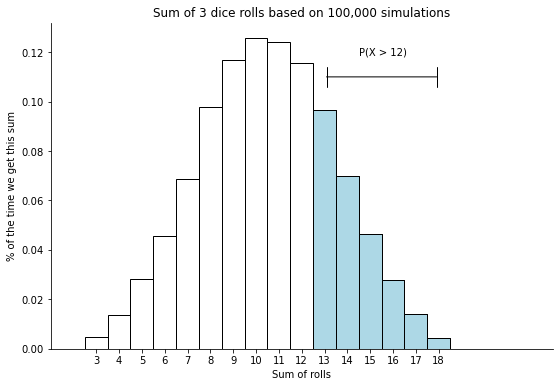

- this is showing how often each one of these sums show up
- this is showing the probability of each of our outcomes

#### Find which simulations "won"

In [102]:
dice_rolls.sum(axis=1) > 12

array([False, False, False, ..., False, False, False])

#### 4. Get our experimental probability based on the results

In [104]:
win_rate = (dice_rolls.sum(axis=1) > 12).mean()
win_rate

0.25666

### To complete this problem, we can calculate the expected profit from our win rate:

In [106]:
#calcaulate expected winnings from win rate and prize money
expected_winnings = win_rate * 15
expected_winnings

3.8499

In [107]:
#calculate expected profit by subtracting game cost from expected winnings
expected_winnings - 5 

-1.1501000000000001

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

### We can recalculate our win rate based on the sums being greater than or equal to 12:

In [108]:
#calculate new win rate
win_rate = (dice_rolls.sum(axis=1) >= 12).mean()
win_rate

0.37231

In [111]:
#calcaulate expected winnings from win rate and prize money
expected_winnings = win_rate * 15
expected_winnings

5.58465

In [112]:
#calculate expected profit by subtracting game cost from expected winnings
expected_winnings - 5

0.5846499999999999

If our win condition changes to the sum being greater than or equal to 12, then, based on our simulations, on average, we expect to win about 60 cents